<a href="https://colab.research.google.com/github/bbchen33/Deep-learning/blob/master/Tensorflow-small-image-cifar10-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

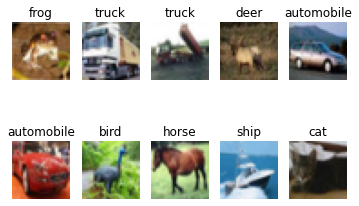

In [5]:
for i in range(10):
  plt.subplot(2,5,i+1)  
  plt.imshow(X_train[i,:,:,:])
  plt.title(labels[int(y_train[i])])
  plt.axis('off')

In [6]:
print(X_train.max())
print(X_train.min())
X_train_normal = X_train/255
print(X_train_normal.max())


255
0
1.0


Normalize by dividing 255 (max value of the pixels)

In [7]:
X_test_normal = X_test/255

In [8]:
y_train_category = tf.keras.utils.to_categorical(y_train, 10)
y_test_category = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
print(y_train_category[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),    
    tf.keras.layers.Dense(10, activation = 'softmax')    
])

In [14]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_normal, y_train_category, batch_size = 512, epochs = 20, validation_split = 0.2, verbose = 0)

In [12]:
def training_progress(model, history):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.title('Accuracy')
  plt.legend()
  
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.title('Loss')  
  plt.legend()
  plt.show()

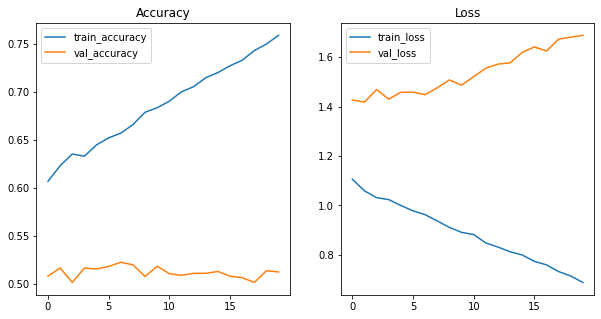

313/313 [==============================] - 1s 2ms/step - loss: 1.6380 - accuracy: 0.5161
Trained with dense layers gives test accuracy of: 0.5160999894142151


In [15]:
training_progress(model, history)

The model trained with only dense layers did not seem to be able to give good accuracy.

In [16]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

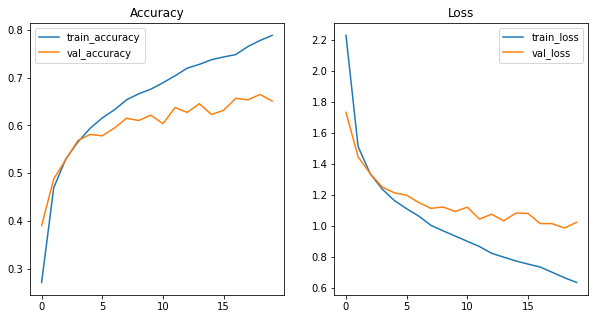

313/313 [==============================] - 1s 2ms/step - loss: 1.0386 - accuracy: 0.6392
Trained with CNN gives test accuracy of: 0.63919997215271


In [18]:
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history2 = model2.fit(X_train_normal, y_train_category, batch_size = 1024, epochs = 20, validation_split = 0.2, verbose = 0)
training_progress(model2, history2)

The accuracy for the train set is very good but not good for the test set. It's clear that the model is overfitting the training data. Let's try adding 2 dropout steps to turn off half of the nodes.

In [19]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

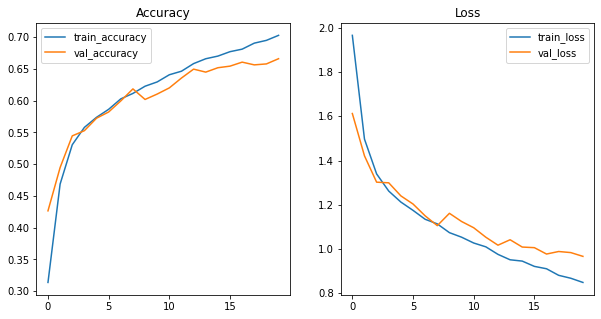

In [21]:
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history3 = model3.fit(X_train_normal, y_train_category, batch_size = 1024, epochs = 20, validation_split = 0.2, verbose = 0)
training_progress(model3, history3)

Adding complexity to the model to see if it can improve the learning.

In [22]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(500, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2), 
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Now the validation score is better than the training set. That means our model is not just memorizing the dataset. Now I can try the same model with more epochs to see if it reaches a better accuracy for the test set.

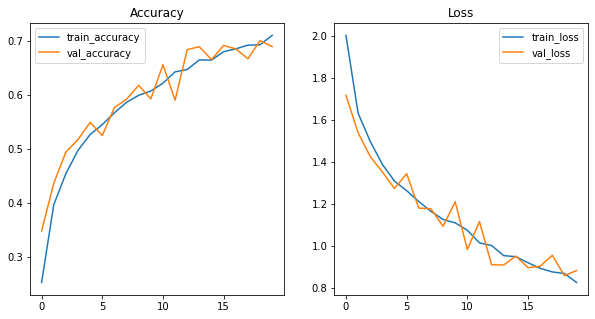

In [24]:
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history4 = model4.fit(X_train_normal, y_train_category, batch_size = 1024, epochs = 20, validation_split = 0.2, verbose = 0)
training_progress(model4, history4)

It's better than before but the accuracy of 0.7 on the test set can still be improved. Now I'm going to do data augmentation to prevent the model from memorizing the train data.

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale =1./255,rotation_range = 30, width_shift_range = 0.2, horizontal_flip = True,validation_split = 0.2)

In [32]:
processed_train = datagen.flow(X_train[:40000], y_train_category[:40000], batch_size =1024, shuffle=True)
processed_val = datagen.flow(X_train[40000:], y_train_category[40000:], batch_size =1024, shuffle=True)

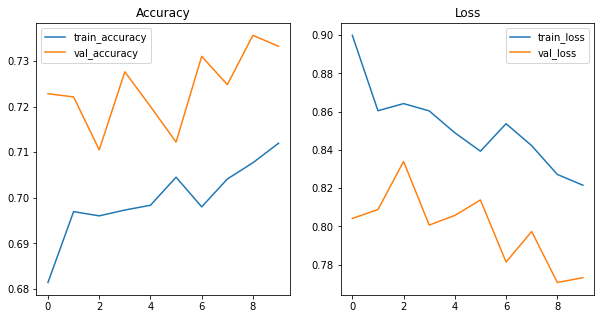

In [34]:
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history5 = model4.fit_generator(processed_train, epochs = 10, validation_data = processed_val, verbose = 0)
training_progress(model4, history5)

Now this looks like the model that can make good prediction with sufficient training since the train and validation accuracy are both going up.

We can also play with the optimizer. Nadam was developed after Adam combining NAG and Adam. It is supposed to control the direction of the gradient descent better.

Turned out the augmented pictures took a lot longer to train and the improvement on the accuracy score is limited so I'll go back to explore training model 4 with nadam optimizer with pre-augmented pictures.

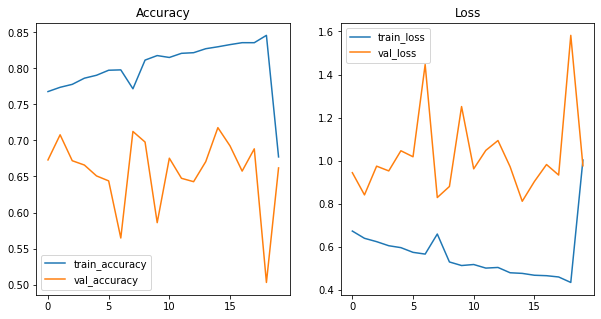

In [36]:
model4.compile(optimizer = 'nadam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history6 = model4.fit(X_train_normal, y_train_category, batch_size = 1024, epochs = 20, validation_split = 0.2, verbose = 0)
training_progress(model4, history6)

Nadam did run better than Adam in this case. Last, I will attempt to run as many epochs as possible before the accuracy starts declining by setting an early stopping callback.

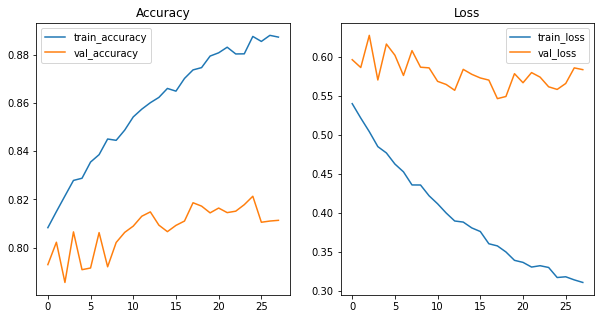

In [37]:
early_stopping = keras.callbacks.EarlyStopping(patience = 10)
model4.compile(optimizer = 'nadam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history7 = model4.fit(X_train_normal, y_train_category, batch_size = 128, 
                      epochs = 100, validation_split = 0.2,
                      callbacks = [early_stopping], verbose = 0)
training_progress(model4, history7)